<a href="https://colab.research.google.com/github/Bernuz2003/Machine-Learning_Alghorithms/blob/master/Classificazione.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CLASSIFICAZIONE** MNIST

In [1]:
import sys
assert sys.version_info >= (3, 7)
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Creazione della cartella che conterrà il dataset **MNIST**

In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Sklearn fornisce tre tipologie di metodi:


*   **fetch_*()**: scarica dataset reali
*   **load_*()**: carica piccoli dataset integrati in Sklearn
*   **make_*()**: genera finti dataset utili per l'addestramento

Dataset numerici si gestiscono comodamente con Pandas, essendo questo un dataset di immagini impostiamo **as_frame=False** per non caricarlo come DataFrame.

In [3]:
from sklearn.datasets import fetch_openml

mnist =fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
# dividiamo dati ed etichette

X, y = mnist.data, mnist.target
print(X)
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['5' '0' '4' ... '4' '5' '6']


In [5]:
X.shape

(70000, 784)

Sono presenti 7000 elementi di 784 valori l'uno (immagini 28*28=784) in cui ogni valore rappresenta l'intensità di colore del pixel (0=binaco, 255=nero).

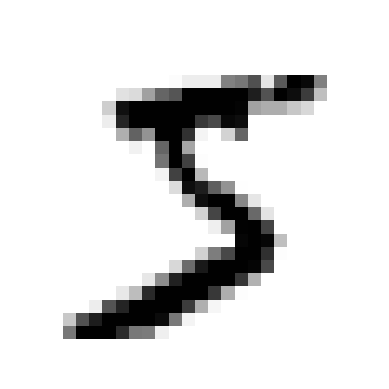

'5'

In [6]:
# visualizziamo il primo elemento del dataset

import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")    # binary perchè immagine in scala di grigi
    plt.axis("off")

some_digit = X[0]   # primo elemento dai dati
plot_digit(some_digit)  # mostra immagine
plt.show()
y[0]    # stampa etichetta associata

L' immagine raffigura un 5 che è anche la rispettiva etichetta

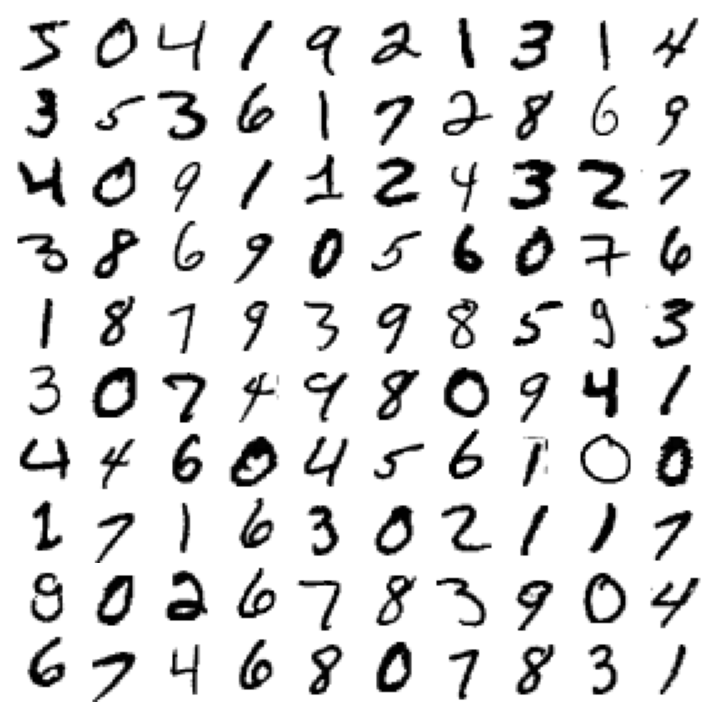

In [7]:
# mostra le prime 100 immagini dei dati

plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

##Suddivisione Train e Test

In [8]:
# i primi 6000 elementi per il train ed i restanti 1000 per il test

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#Classificazione Binaria

Iniziamo con un problema di classificazione più semplice ed addestriamo il modello a riconoscere una sola cifra (per esempio il 5), dopo lo estenderemo

In [9]:
y_train_5 = y_train == '5'
y_test_5 = y_test == '5'

##**Stochastic Gradient Descent** (SGD) o Stochastic GD

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [11]:
sgd_clf.predict([some_digit])

array([ True])

Il modello riconosce correttamente l'immagine come un 5

#Misurazione Performance

La misurazione delle performace di un modello per la classificazioen risulta più complesso rispetto alla regressione

In [12]:
# utilizziamo la cross-validation per valutare il modello (su 3 subset del trainset)

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Risulta circa il 95% di accuratezza su tutti e 3 i subset.

Adesso utilizziamo un modello che classifica ogni immagine nella calsse più frequente (non-5, False)

In [13]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(dummy_clf.predict(X_train))

[False False False ... False False False]


In [14]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

Anche questo modello risulta avere accuratezza del 90%. Infatti se il 5 è presente nel 10% delle immagini del dataset, classificando ogni immagine come False indovinerà il 90% delle volte.

Dunque l'accuratezza non è una metrica efficace nel misurare le performance di un classificatore, specialmente con dataset sbilanciati.

#Confusion Matrix

In [15]:
# cross_val_predict invece di restituire un valutation score, restituisce le previsioni fatte in ogni subset

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

Ogni riga rappresenta la classe effettiva, mentre ogni colonna la classe stimata.
Prima riga classe non-5, seconda riga classe 5. 538932 sono stati stimati correttamente non-5 (Veri Negativi), 687 erroneamente stimati come 5 (Falsi Positivi). 1891 errorneamente stimati non-5 (Falsi Negativi), 3530 correttamente stimati 5 (Veri Positivi).

##Precisione e Richiamo

In [18]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

Anche calcolabile con la formula:
**VP/(FP + VP)**

In [19]:
cm[1,1] / (cm[0,1] + cm[1,1])

0.8370879772350012

In [20]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

Anche calcolabile con la formula: **VP/(FN + VP)**

In [21]:
cm[1,1] / (cm[1,0] + cm[1,1])

0.6511713705958311

Notiamo adesso che di tutti i 5 previsti dal modello l'83,7% sono corretti, ma ne riconosce solo il 65,1%. Meglio usare un altra metrica chiamata F1 che esegue la media armonica tra precision_score e recall_score

In [23]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

##Trade-off Precisione e Richimao

Sklearn non ci permette di settare il threshold del modello, ma fornisce una funzione che restituisce un punteggio per ogni istanza. Quando questo punteggio è maggiore del threshold il modello riconosce un 5 altrimenti no.

In [25]:
y_score = sgd_clf.decision_function([some_digit])
y_score

array([2164.22030239])

In [26]:
threshold = 3000
y_some_digit_pred = y_score > threshold
y_some_digit_pred

array([False])

In [27]:
# prendiamo i punteggi associati ad ogni istanza

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [32]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

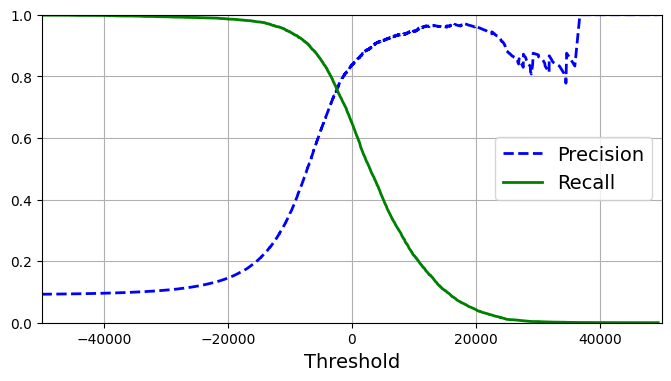

In [36]:
plt.figure(figsize=(8, 4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
#plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

idx = (thresholds >= threshold).argmax()
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()

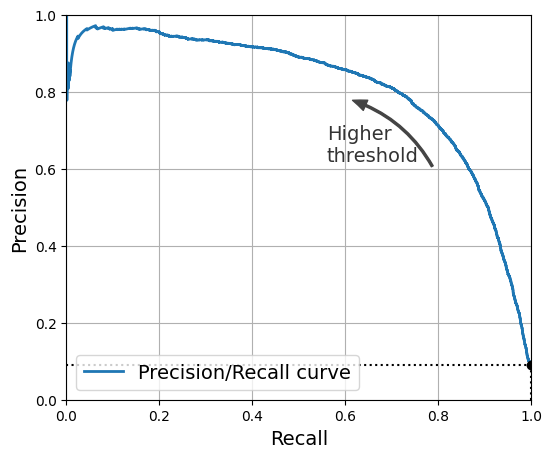

In [39]:
import matplotlib.patches as patches

plt.figure(figsize=(6, 5))

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

Dai 2 grafici si nota che volendo aumentare troppo la precisione si avrà automaticamente un calo del richiamo e viceversa.
Come trovare il giusto threshold per avere una precisione del 90%?

In [40]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

In [42]:
y_train_pred_90 = y_scores >= threshold_for_90_precision
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

Esattamente come ci aspettavamo, il 90% di precisione.

In [43]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

Con il 90% di precisione ci si accontenta di un 48% di richiamo.

##Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [46]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [47]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [48]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

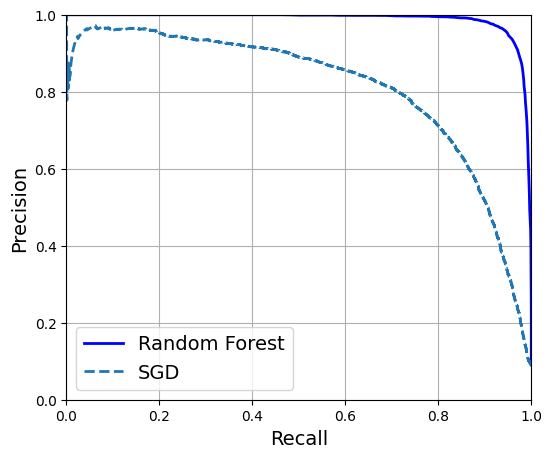

In [49]:
plt.figure(figsize=(6, 5))

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
plt.show()

Random Forest sembra essere nettamente migliore rispetto allo Stochastic Gradient Descent

In [50]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [51]:
precision_score(y_train_5, y_train_pred_forest)

0.9897468089558485

In [52]:
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402

Precision_score = 99%
Recall_score = 87,25%